In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('customer_data_records.csv')
print(data.head())
data.info()

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              174 non-null    int64
 1   Annual Income (k$)      174 non-null    int64
 2   Spending Score (1-100)  174 non-null    int64
dtypes: int64(3)
memory usage: 4.2 KB


In [3]:
# For clustering, we will use 'Annual Income (k$)' and 'Spending Score (1-100)'
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [6]:
# Add the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

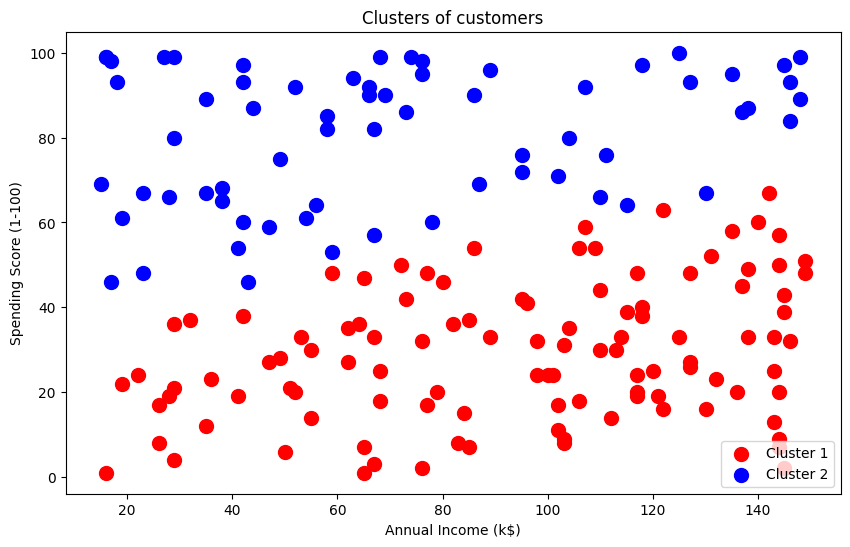

In [7]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Cluster'] == 0]['Annual Income (k$)'], data[data['Cluster'] == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[data['Cluster'] == 1]['Annual Income (k$)'], data[data['Cluster'] == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('customer_clusters.png')

In [8]:
# Display the first few rows with cluster assignments
print("Data with cluster assignments:")
print(data.head())

Data with cluster assignments:
   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                 117                      20        0
1           2                 107                      59        0
2           3                  29                      36        0
3           4                 121                      19        0
4           5                  86                      90        1


In [9]:
# Save the clustered data to a new CSV file
data.to_csv('customer_data_with_clusters.csv', index=False)